In [1]:
if 1:
  from google.colab import drive
  drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install -U git+https://github.com/qubvel/efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-4axbnad4
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/efficientnet /tmp/pip-req-build-4axbnad4
  Resolved https://github.com/qubvel/efficientnet to commit f7f3e736c113b872caf53dae9fbbda996a8eb87d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 5.6 MB/s eta 0:00:00
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18447 sha256=21cd75a818df67392cdda2da96c4894917dc5aa56f8a98b9e47fa35749255323
  Stored in directory: /tmp/pip-ephem-wheel-cache-mgdcuob0/wheels/4f/5d/1a/f5568d40de3899e676981cbe16009738bab99940f320f402b5
Successfully built efficientnet


In [3]:
!pip install -U git+https://github.com/qubvel/classification_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/classification_models to /tmp/pip-req-build-k4rd3nir
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models /tmp/pip-req-build-k4rd3nir
  Resolved https://github.com/qubvel/classification_models to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20045 sha256=d9c0028199923cdccff702c76053273f658ef6fa86c274686821cb4b7534ffc9
  Stored in directory: /tmp/pip-ephem-wheel-cache-pfp83lzt/wheels/77/00/d7/a111c45a5eb8c497815680b5e64c9b9192b1516d9c22281ee1
Successfully built image-classifiers


In [4]:
! pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.0 MB/s eta 0:00:00


In [5]:
!nvidia-smi  # GPU Configuration

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# **Mura Classification**

In [6]:
import tensorflow_addons as tfa

In [7]:
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
from glob import glob

In [8]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
if 0:
    import splitfolders
    splitfolders.ratio('/content/gdrive/MyDrive/MURA DATASET/DL_MURA', output="/content/gdrive/MyDrive/MURA DATASET/Splitted", seed=1337, ratio=(.7, 0.1,0.2)) 

# **Load Data**

In [10]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
IMAGE_SIZE=[256,256]
TRAIN_PATH = '/content/gdrive/MyDrive/MURA DATASET/Splitted/train'
TEST_PATH = '/content/gdrive/MyDrive/MURA DATASET/Splitted/test'
VALID_PATH = '/content/gdrive/MyDrive/MURA DATASET/Splitted/val'



Mounted at /content/gdrive


In [11]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [12]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
plot_datagen = ImageDataGenerator( dtype='float32', 
                                  rescale=1.0/255.0
                                 )

plot_generator = plot_datagen.flow_from_directory(TRAIN_PATH,
                                                   shuffle=True,
                                                   target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 3503 images belonging to 7 classes.


(32, 256, 256, 3)


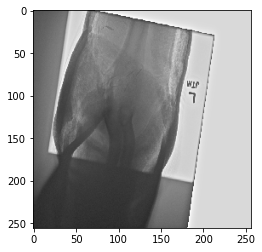

(32, 256, 256, 3)


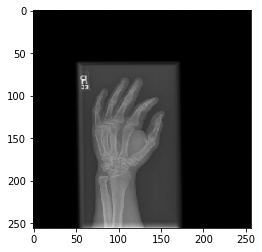

(32, 256, 256, 3)


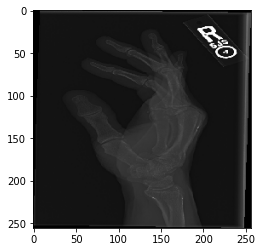

(32, 256, 256, 3)


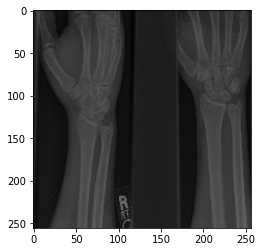

(32, 256, 256, 3)


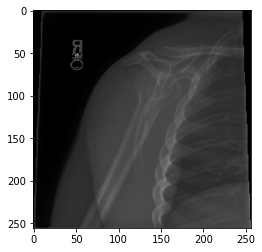

In [13]:
for _ in range(5):
    img, label = plot_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [13]:
# Preprocessing the Training Set

from tensorflow.keras.preprocessing.image import  ImageDataGenerator
mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]

def standardize(image_data):
    image_data -= np.array(mean)
    image_data /= np.array(std)
    return image_data

#tf.keras.applications.efficientnet_v2.preprocess_input
train_datagen = ImageDataGenerator(dtype='float32',
                                   rescale=1.0/255.0,
                                   preprocessing_function=standardize,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   rotation_range=10, # rotation
                                   vertical_flip=True,
                                   horizontal_flip=True
                                   )

train_generator = train_datagen.flow_from_directory(TRAIN_PATH,
                                                   shuffle=True,
                                                   target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                   batch_size=32,
                                                   class_mode='categorical')

val_datagen = ImageDataGenerator( dtype='float32', 
                                  rescale=1.0/255.0,
                                  preprocessing_function=standardize
                                 )

val_generator = val_datagen.flow_from_directory(VALID_PATH,
                                                   shuffle=True,
                                                   target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                   batch_size=32,
                                                   class_mode='categorical')



test_generator = val_datagen.flow_from_directory(TEST_PATH,
                                                   shuffle=False,
                                                   target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                   batch_size=32,
                                                   class_mode='categorical')


Found 3503 images belonging to 7 classes.
Found 497 images belonging to 7 classes.
Found 1010 images belonging to 7 classes.


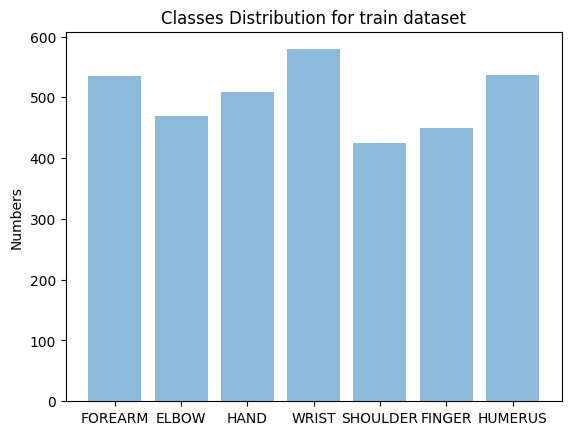

In [28]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

mura_class = plot_generator.labels.tolist()

countOfLabel = [mura_class.count(0), mura_class.count(1), mura_class.count(2), mura_class.count(3), mura_class.count(4), mura_class.count(5), mura_class.count(6)]

labels = ('FOREARM','ELBOW','HAND','WRIST','SHOULDER','FINGER','HUMERUS')
y_pos = np.arange(len(labels))
performance = countOfLabel

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Numbers')
plt.title('Classes Distribution for train dataset')

plt.show()

In [14]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import tensorflow as tf
import efficientnet.tfkeras as efn 



#base_model = EfficientNetB3(include_top=False, weights='imagenet')
base_model = efn.EfficientNetB0(include_top = False, weights = 'noisy-student', input_shape = (*IMAGE_SIZE, 3))
base_model.trainable = True
# add a global spatial average pooling layer
x = base_model.output
#base_model.summary()

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.1)(x)


# ###############Fine-Tune###################
# Add your new layers to here 
# Add your new layers to here 
# Add your new layers to here 
#############################################


predictions = layers.Dense(7, activation='softmax')(x) #burayi 9 yap
model = Model(inputs=base_model.input, outputs=predictions)


model.compile(loss='categorical_crossentropy',  optimizer = Adam(lr=1e-3), metrics=['accuracy',  tf.keras.metrics.AUC(), f1_m, precision_m, recall_m ])


16696600/16696600 [==============================] - 1s 0us/step


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
from tensorflow.keras.utils import get_custom_objects 
def mish(x,beta=1):
  return x*tf.math.tanh(tf.math.softplus(x))
get_custom_objects().update({'mish':mish})

In [43]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import tensorflow as tf
import efficientnet.tfkeras as efn 
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
base_model1 = efn.EfficientNetB0(include_top = False, weights = 'noisy-student', input_shape = (*IMAGE_SIZE, 3))
base_model1.trainable = True
input_shape = (1, 256, 256, 3)
x1 = base_model1.output
#base_model.summary()

x1 = layers.GlobalAveragePooling2D()(x1)
x1 = layers.Dropout(0.1)(x1)
x1=layers.Flatten()(x1)
x1=layers.Dense(128)(x1)
x1=layers.Activation(activation='mish')(x1)
x1=layers.Dense(64)(x1)
x1=layers.Activation(activation='mish')(x1)
x1= layers.Dropout(0.1)(x1)

predictions1 = layers.Dense(7, activation='softmax')(x1) #
model1 = Model(inputs=base_model1.input, outputs=predictions1)
model1.compile(loss='categorical_crossentropy',  optimizer = Adam(lr=1e-3), metrics=['accuracy',  tf.keras.metrics.AUC(), f1_m, precision_m, recall_m ])



/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 128, 128, 32  128         ['stem_conv[0][0]']              
                                )                                                             

In [44]:
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 128, 128, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 128, 128, 32  128         ['stem_conv[0][0]']              
                                )                                                           

# **Model Save and Early Stop**

In [20]:
%%time
# Running the model
import tensorflow as tf
model_name_save= '/content/gdrive/MyDrive/MURA DATASET/nn_model.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name_save, save_freq='epoch', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')  
early_stop = tf.keras.callbacks.EarlyStopping(  monitor='val_accuracy', patience=12, verbose=1,  mode='max',restore_best_weights=False)
plateau = tf.keras.callbacks.ReduceLROnPlateau(  monitor='val_accuracy', factor=0.1, patience=50,  min_lr=5e-5, verbose=1,  mode='max')

#Training Model
history = model.fit(train_generator, validation_data=val_generator, epochs=1000, callbacks=[checkpoint, early_stop, plateau],  shuffle=True, verbose = 1)

Epoch 1/1000
110/110 [==============================] - ETA: 0s - loss: 0.4669 - accuracy: 0.8370 - auc: 0.9804 - f1_m: 0.8194 - precision_m: 0.8802 - recall_m: 0.7904 
Epoch 1: val_accuracy improved from -inf to 0.90744, saving model to /content/gdrive/MyDrive/MURA DATASET/nn_model.hdf5
110/110 [==============================] - 2250s 20s/step - loss: 0.4669 - accuracy: 0.8370 - auc: 0.9804 - f1_m: 0.8194 - precision_m: 0.8802 - recall_m: 0.7904 - val_loss: 0.2758 - val_accuracy: 0.9074 - val_auc: 0.9918 - val_f1_m: 0.9050 - val_precision_m: 0.9157 - val_recall_m: 0.8950 - lr: 0.0010
Epoch 2/1000
110/110 [==============================] - ETA: 0s - loss: 0.2022 - accuracy: 0.9412 - auc: 0.9947 - f1_m: 0.9381 - precision_m: 0.9481 - recall_m: 0.9287
Epoch 2: val_accuracy improved from 0.90744 to 0.92153, saving model to /content/gdrive/MyDrive/MURA DATASET/nn_model.hdf5
110/110 [==============================] - 79s 716ms/step - loss: 0.2022 - accuracy: 0.9412 - auc: 0.9947 - f1_m: 0.9

In [45]:
# Running the model
import tensorflow as tf
model_name_save= '/content/gdrive/MyDrive/MURA DATASET/nn1_model.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name_save, save_freq='epoch', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')  
early_stop = tf.keras.callbacks.EarlyStopping(  monitor='val_accuracy', patience=12, verbose=1,  mode='max',restore_best_weights=False)
plateau = tf.keras.callbacks.ReduceLROnPlateau(  monitor='val_accuracy', factor=0.1, patience=50,  min_lr=5e-5, verbose=1,  mode='max')

#Training Model
history2 = model1.fit(train_generator, validation_data=val_generator, epochs=1000, callbacks=[checkpoint, early_stop, plateau],  shuffle=True, verbose = 1)

Epoch 1/1000
110/110 [==============================] - ETA: 0s - loss: 0.5331 - accuracy: 0.8287 - auc_2: 0.9746 - f1_m: 0.7939 - precision_m: 0.8472 - recall_m: 0.7615
Epoch 1: val_accuracy improved from -inf to 0.82696, saving model to /content/gdrive/MyDrive/MURA DATASET/nn1_model.hdf5
110/110 [==============================] - 89s 731ms/step - loss: 0.5331 - accuracy: 0.8287 - auc_2: 0.9746 - f1_m: 0.7939 - precision_m: 0.8472 - recall_m: 0.7615 - val_loss: 0.5311 - val_accuracy: 0.8270 - val_auc_2: 0.9754 - val_f1_m: 0.8292 - val_precision_m: 0.8427 - val_recall_m: 0.8166 - lr: 0.0010
Epoch 2/1000
110/110 [==============================] - ETA: 0s - loss: 0.2260 - accuracy: 0.9326 - auc_2: 0.9929 - f1_m: 0.9330 - precision_m: 0.9427 - recall_m: 0.9238
Epoch 2: val_accuracy improved from 0.82696 to 0.89336, saving model to /content/gdrive/MyDrive/MURA DATASET/nn1_model.hdf5
110/110 [==============================] - 80s 722ms/step - loss: 0.2260 - accuracy: 0.9326 - auc_2: 0.9929 

In [22]:
scores = model.evaluate_generator(test_generator)

<ipython-input-22-04fdca2bd742>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator)


In [46]:
scores2 = model1.evaluate_generator(test_generator)

<ipython-input-46-4220875e3168>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores2 = model1.evaluate_generator(test_generator)


In [24]:
print(scores[0])
print(scores[1])
print(scores[2])
print(scores[3])
print(scores[4])

0.16548849642276764
0.9504950642585754
0.9958995580673218
0.9504883289337158
0.9523892402648926


In [47]:
print(scores2[0])
print(scores2[1])
print(scores2[2])
print(scores2[3])
print(scores2[4])

0.12713681161403656
0.9613861441612244
0.9959014654159546
0.9610140323638916
0.9639246463775635


# **Visualization model training**

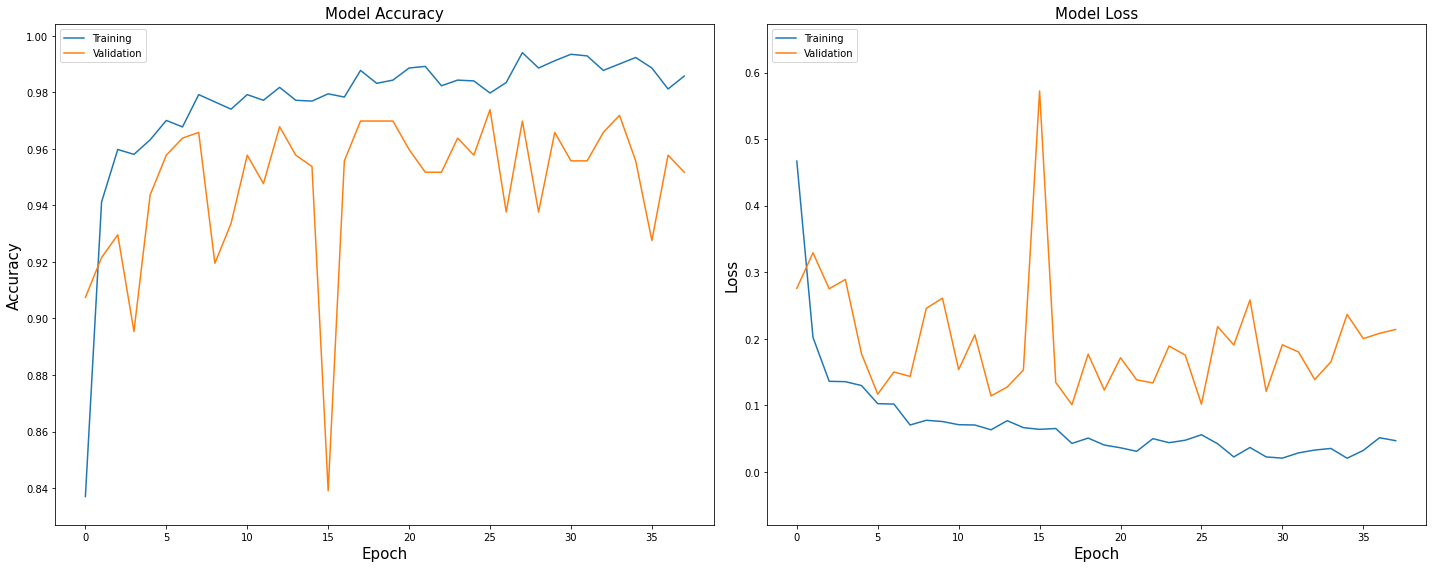

In [26]:
xlabel = 'Epoch'
legends = ['Training', 'Validation']

ylim_pad = [0.01, 0.1]
plt.figure(figsize=(20, 8))

# Plot training & validation Accuracy values
y1 = history.history['accuracy']
y2 = history.history['val_accuracy']

min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]

plt.subplot(121)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Accuracy', fontsize=15)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.tight_layout()  
                         
# Plot training & validation loss values
y1 = history.history['loss']
y2 = history.history['val_loss']

min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
    
plt.subplot(122)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Loss', fontsize=15)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')

plt.tight_layout()                  
plt.show()
     

# **Visualization model2 training**

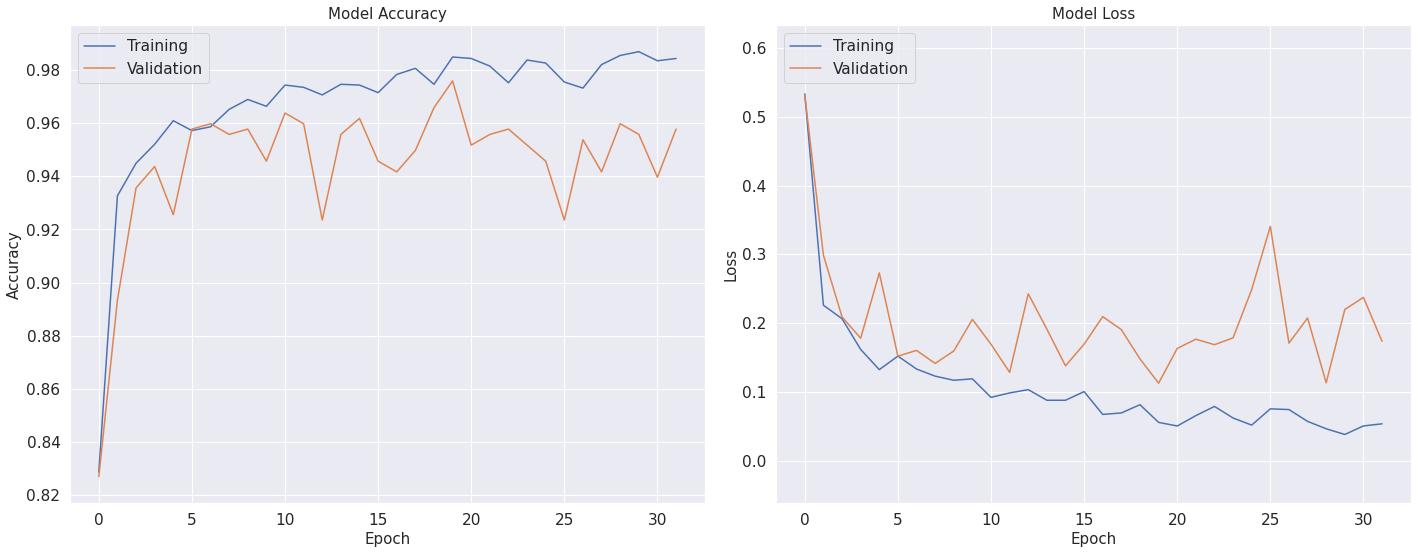

In [52]:
xlabel = 'Epoch'
legends = ['Training', 'Validation']

ylim_pad = [0.01, 0.1]
plt.figure(figsize=(20, 8))

# Plot training & validation Accuracy values
y1 = history2.history['accuracy']
y2 = history2.history['val_accuracy']

min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]

plt.subplot(121)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Accuracy', fontsize=15)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.tight_layout()  
                         
# Plot training & validation loss values
y1 = history2.history['loss']
y2 = history2.history['val_loss']

min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
    
plt.subplot(122)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Loss', fontsize=15)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')

plt.tight_layout()                  
plt.show()
     

# **Accuracy score, confusion matrix and f1 score**

<ipython-input-56-3009fc0a4a01>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator,  steps=len(test_generator),verbose=2)


32/32 - 8s - 8s/epoch - 254ms/step
Result Confusion Matrix
------------------------------------------------------------------------------------------
Accuracy:  96.83168316831683 %
Precision:  96.77567845220125 %
Recall:  96.80022849343185 %
f1:  96.76839459257451 %


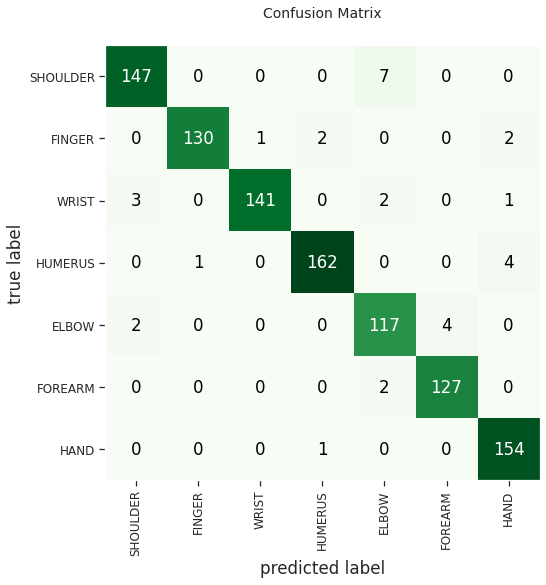

Sensitivity: 100.00%
Specificity: 100.00%


              precision    recall  f1-score   support

    SHOULDER       0.97      0.95      0.96       154
      FINGER       0.99      0.96      0.98       135
       WRIST       0.99      0.96      0.98       147
     HUMERUS       0.98      0.97      0.98       167
       ELBOW       0.91      0.95      0.93       123
     FOREARM       0.97      0.98      0.98       129
        HAND       0.96      0.99      0.97       155

    accuracy                           0.97      1010
   macro avg       0.97      0.97      0.97      1010
weighted avg       0.97      0.97      0.97      1010



In [56]:
# evaluate the model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import pandas as pd
y_true = test_generator.classes

model.load_weights("/content/gdrive/MyDrive/MURA DATASET/nn_model.hdf5") #load model
predictions = model.predict_generator(test_generator,  steps=len(test_generator),verbose=2)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)


def scores(y_true,y_pred):
  accuracy = accuracy_score(y_true,y_pred)
  precision = precision_score(y_true,y_pred,average='macro')
  recall = recall_score(y_true,y_pred,average='macro')
  f1 = f1_score(y_true,y_pred,average='macro')
  confusionmatrix = confusion_matrix(y_true, y_pred)
  print("="*90)
  print("Result Confusion Matrix")
  print("-"*90)
  print("Accuracy: ", accuracy*100, "%")
  print("Precision: ", precision*100, "%")
  print("Recall: ", recall*100, "%")
  print("f1: ", f1*100, "%")
  print("="*90)
  labels = {'FOREARM','ELBOW','HAND','WRIST','SHOULDER','FINGER','HUMERUS'}
  fig, ax = plot_confusion_matrix(conf_mat=confusionmatrix ,  figsize=(10,8), hide_ticks=True,cmap=plt.cm.Greens)

  plt.title("Confusion Matrix", fontsize=14)
  plt.xticks(range(len(labels)), labels, fontsize=12,rotation="vertical")
  plt.yticks(range(len(labels)), labels, fontsize=12)
  sns.set(font_scale=1.4) # for label size
  plt.show()
  cls_report_print = classification_report(y_true, y_pred, target_names=labels)
  cls_report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
  total1=sum(sum(confusionmatrix))

  ##### From confusion matrix calculate accuracy
  print("="*90)
  sensitivity1 = confusionmatrix[0,0]/(confusionmatrix[0,0]+confusionmatrix[0,1])
  print("%s%.2f%s"% ("Sensitivity: ", sensitivity1*100, "%"))
  specificity1 = confusionmatrix[1,1]/(confusionmatrix[1,0]+confusionmatrix[1,1])
  print("%s%.2f%s"% ("Specificity: ", specificity1*100, "%"))

  print("\n")
  print("="*90)
  print("="*90)
  print(cls_report_print)
  print("="*90)
scores(y_true,predicted_classes)

<ipython-input-54-aab02fe48075>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions1 = model1.predict_generator(test_generator,  steps=len(test_generator),verbose=2)


32/32 - 8s - 8s/epoch - 258ms/step
Result Confusion Matrix
------------------------------------------------------------------------------------------
Accuracy:  97.12871287128712 %
Precision:  97.13264539109286 %
Recall:  96.92682490515722 %
f1:  97.00663511215139 %


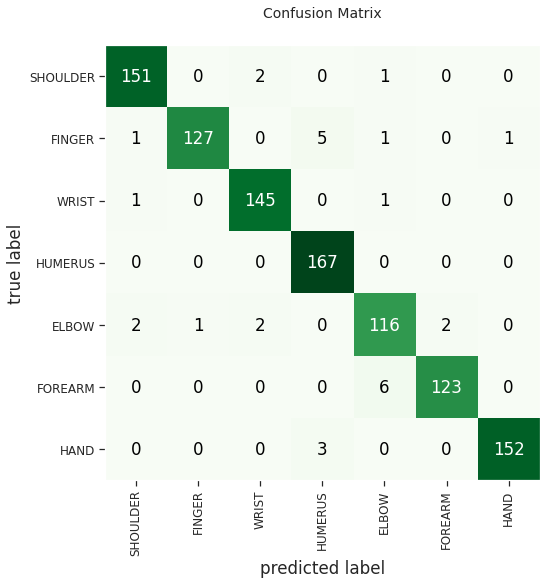

Sensitivity: 100.00%
Specificity: 99.22%


              precision    recall  f1-score   support

    SHOULDER       0.97      0.98      0.98       154
      FINGER       0.99      0.94      0.97       135
       WRIST       0.97      0.99      0.98       147
     HUMERUS       0.95      1.00      0.98       167
       ELBOW       0.93      0.94      0.94       123
     FOREARM       0.98      0.95      0.97       129
        HAND       0.99      0.98      0.99       155

    accuracy                           0.97      1010
   macro avg       0.97      0.97      0.97      1010
weighted avg       0.97      0.97      0.97      1010



In [54]:
# evaluate the model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import pandas as pd
y_true = test_generator.classes

model1.load_weights("/content/gdrive/MyDrive/MURA DATASET/nn1_model.hdf5") #load model
predictions1 = model1.predict_generator(test_generator,  steps=len(test_generator),verbose=2)
# Get most likely class
predicted_classes1 = np.argmax(predictions1, axis=1)


def scores(y_true,y_pred):
  accuracy = accuracy_score(y_true,y_pred)
  precision = precision_score(y_true,y_pred,average='macro')
  recall = recall_score(y_true,y_pred,average='macro')
  f1 = f1_score(y_true,y_pred,average='macro')
  confusionmatrix = confusion_matrix(y_true, y_pred)
  print("="*90)
  print("Result Confusion Matrix")
  print("-"*90)
  print("Accuracy: ", accuracy*100, "%")
  print("Precision: ", precision*100, "%")
  print("Recall: ", recall*100, "%")
  print("f1: ", f1*100, "%")
  print("="*90)
  labels = {'FOREARM','ELBOW','HAND','WRIST','SHOULDER','FINGER','HUMERUS'}
  fig, ax = plot_confusion_matrix(conf_mat=confusionmatrix ,  figsize=(10,8), hide_ticks=True,cmap=plt.cm.Greens)

  plt.title("Confusion Matrix", fontsize=14)
  plt.xticks(range(len(labels)), labels, fontsize=12,rotation="vertical")
  plt.yticks(range(len(labels)), labels, fontsize=12)
  sns.set(font_scale=1.4) # for label size
  plt.show()
  cls_report_print = classification_report(y_true, y_pred, target_names=labels)
  cls_report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
  total1=sum(sum(confusionmatrix))

  ##### From confusion matrix calculate accuracy
  print("="*90)
  sensitivity1 = confusionmatrix[0,0]/(confusionmatrix[0,0]+confusionmatrix[0,1])
  print("%s%.2f%s"% ("Sensitivity: ", sensitivity1*100, "%"))
  specificity1 = confusionmatrix[1,1]/(confusionmatrix[1,0]+confusionmatrix[1,1])
  print("%s%.2f%s"% ("Specificity: ", specificity1*100, "%"))

  print("\n")
  print("="*90)
  print("="*90)
  print(cls_report_print)
  print("="*90)
scores(y_true,predicted_classes1)